In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf

<Axes: >

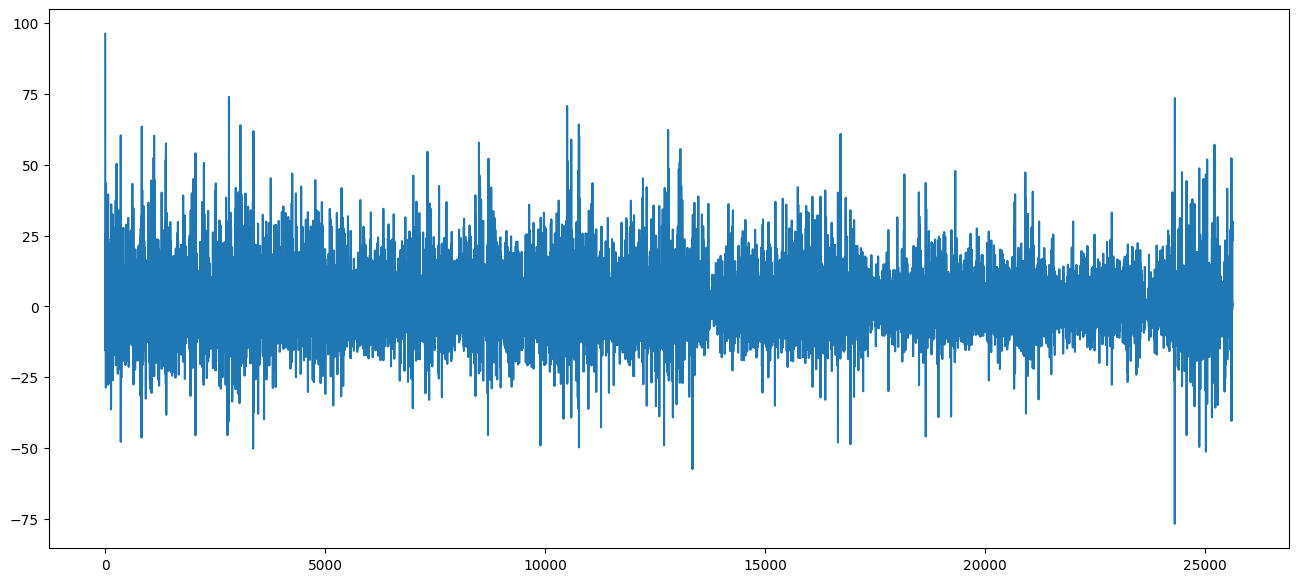

In [2]:
network_analytics = pd.read_csv('./data/Network_Analytics.csv')
series = pd.Series(network_analytics['OutboundUtilzation (%)'])
series.diff().fillna(series).plot(figsize=(16, 7))

## Lets run some correlation tests

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

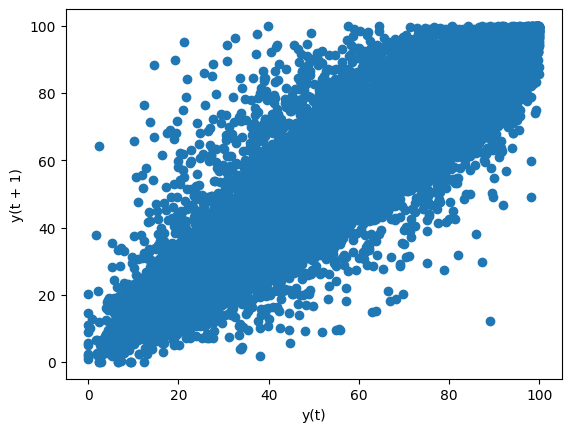

In [3]:
pd.plotting.lag_plot(series)

We can clearly see that there is some correlation in the data. Lets find the Pearson correlation coefficient.

In [4]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.922919
t+1  0.922919  1.000000


The value 0.922919 tell us, that there is stong positive correlation.

Autocorrelation plot:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

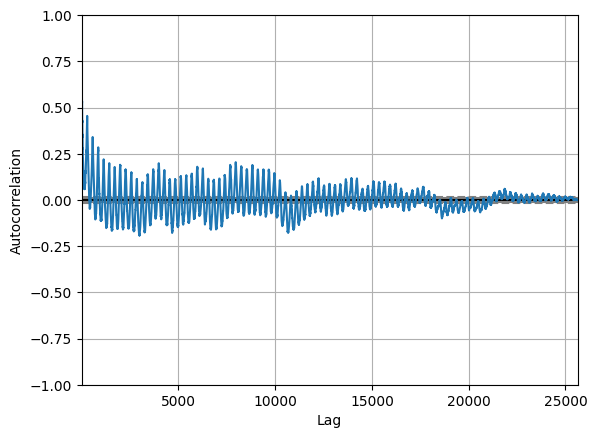

In [5]:
pd.plotting.autocorrelation_plot(series)

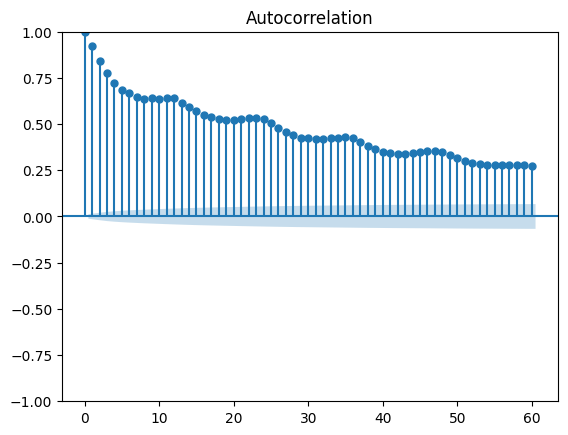

In [6]:
plot_acf(series, lags=60)
plt.show()

Coefficients: [ 1.64147578  0.9499226  -0.16012616 ... -0.00256898 -0.00896752
  0.00489672]
predicted=80.537523, expected=85.289100
predicted=72.460094, expected=28.324500
predicted=54.851135, expected=20.574100
predicted=73.111134, expected=68.903500
predicted=64.785913, expected=9.146490
predicted=59.299827, expected=32.867900
predicted=65.974416, expected=12.900900
predicted=60.847636, expected=7.348350
predicted=58.516068, expected=14.900000
predicted=61.435215, expected=34.847800
predicted=58.182424, expected=6.001230
predicted=60.805721, expected=22.191500
predicted=62.836045, expected=62.296900
Test RMSE: 39.560


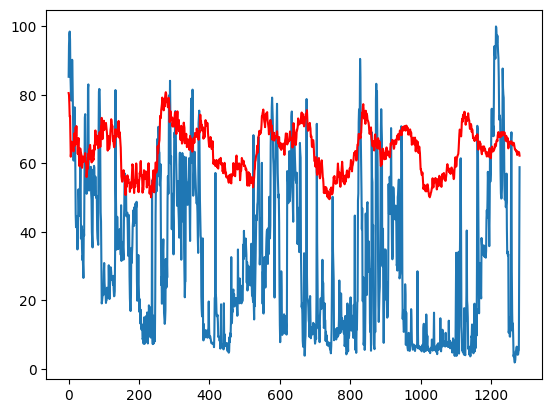

In [8]:
X = series.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
# train autoregression
model = AutoReg(train, lags=len(X)-size)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    if i % 100 == 0:
        print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()